## Kulturnav - Same as Wikidata  
* [This Notebook](https://github.com/salgo60/open-data-examples/blob/master/Kulturnav%20-%20Entity-sameAsWD.ipynb)
* [API](https://kulturnav.org/info/api)
  * [get all same as](https://kulturnav.org/api/search/actualEntityType:Person,entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*)

In [18]:
import urllib3, json
import traceback
import pandas as pd  
from tqdm.notebook import trange  
http = urllib3.PoolManager() 
pd.set_option("display.max.columns", None) 
urlbase = "https://kulturnav.org/api/search/actualEntityType:Person,entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*?start=" 
urlbase = "https://kulturnav.org/api/search/actualEntityType:Person,entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*/" 
urlbase = "https://kulturnav.org/api/search/entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*/" 

dftot = pd.DataFrame()
listNewKulturnav =[]
for i in trange(1,5000,20):
    url = urlbase + str(i)
    r = http.request('GET', url)
    if len(r.data) > 10: 
        #print(len(r.data),r.status, url)
        new_item = dict()

        try:
            captionsv = ""
            aptionno = ""
            data = json.loads(r.data)
            dftot = dftot.append(pd.DataFrame(data),sort=False)
            for d in data:
                try:
                    captionsv = d["caption"]["sv"]
                except:
                    captionsv = ""
                try:
                    captionno = d["caption"]["no"]
                except:
                    captionno = ""
                try:
                    sameasList = d["properties"]["entity.sameAs"]
                    for s in sameasList:
                        wdurl = s["value"]
                        if "wikidata.org" in wdurl:
                            if d["uuid"] in "d52e11ab-7f03-4f3e-bdc4-da24ee497c95":
                                print("\t",type(wdurl),"\t", wdurl)
                            wdurl =  wdurl.replace("https://www.wikidata.org/entity/","")
                            break

                except:
                    pass
                #print(d["uuid"],"|",d["entityType"],"|",captionsv,"|",captionno,"|",wdurl)
                print(d["uuid"],"|",captionsv,"|",wdurl)
                new_item['uuid'] = d["uuid"]
                new_item['entityType'] = d["entityType"]
                new_item['captionsv'] = captionsv
                new_item['captionno'] = captionno
                new_item['wdurl'] = wdurl

                listNewKulturnav.append(new_item)
        except Exception:
            traceback.print_exc()
            print("\tError in i=",i) 
    else:
        print(len(r.data),i,url)
print (len(listNewKulturnav) ," antal poster")



f5a9e5dd-8331-4575-8fd0-f1064afe702b |  | Q959104
5c875e5a-ef0e-4dcb-82e8-ad548d429308 |  | Q5563080
31caadea-9e62-4661-a312-73b18c38bd12 |  | Q1702846
d70801d2-b76a-4c0f-ba89-61f716c25bbb |  | Q1305835
8f1dbc00-3bde-4d75-a783-ccccaeacf424 |  | Q683115
0100f079-ff73-405b-a97f-23768d27d7a6 |  | Q4958665
3cbf8e50-945a-497e-89c5-e2313d94f553 |  | Q5957823
73b2ca6a-cf73-404d-bc4c-3a05d0ebc87f |  | Q1040662
7b232167-2f42-431e-acf0-deda702697a7 |  | Q1385654
5d812196-a9b1-4851-9fda-439609c82c19 |  | Q48548
49b788df-2489-459d-b883-f744047bb80c |  | Q330061
2a6056ad-c90f-49c1-916b-a048ddb2ae82 |  | Q72292
90c37c2b-c180-4759-823b-7b400cc9d7d7 |  | Q72292
fd2a2395-352c-4f4f-b3f3-a5c76d564ec0 |  | Q350420
578c6121-572f-4b5c-a477-a3ec33b9fe83 | 25-årskriget mot Ryssland (1570 - 1595) | Q1634776
7d28ac12-1e95-4805-a884-bbedc9690ffb | AB Flygindustri (Halmstad) (Flygplanstillverkare) | Q11849647
0042e836-e5af-4159-aeaf-8e080b080851 | AB Flygindustri (Limhamn) (Flygplanstillverkare) | Q287757
0f16b07

dd31e4df-ae1b-49af-8fa9-22298026da8f | Barup, Kerstin (1953 - ) | Q16043398
78f88e78-8740-4aa4-b6c1-95f587c6d5a8 | Bauer, Walter (1912 - 1994) | Q5567338
61456455-f205-459e-909a-a2d00bcf0da1 |  | Q24046078
122560b4-060d-4ad9-b69e-1d83bdd1a694 | Beckeman, Knut (1851 - 1943) | Q5568234
2d3cb1fe-59d4-4344-ba4e-c04595388e27 | Beechcraft (Flygplanstillverkare) | Q634227
b981f4dd-00f7-4dff-a1c9-ec0d480a718e | Befwe, Emil (1860 - 1939) | Q5568725
e36e0655-dbce-4654-b026-b02c194ef8a2 |  | Q18508529
4ac9f588-b7ff-4865-82ca-1f65742cf7b5 | Bell Helicopter (Flygplanstillverkare) | Q815723
1641f20d-3456-4436-9016-e4543edcad09 | BELOS (1984) | Q5636023
a5b86846-c306-4d96-ac9e-320c4b800930 | Benckert, Elis (1881 - 1912) | Q5569710
9117c007-c410-49fd-acef-16249c2fecb2 |  | Q1430656
d27c2008-c830-4521-9899-1e843a54b66d | Bengtson, Karl (1878 - 1935) | Q5570040
1080b63b-bdf8-4aee-96ec-be7697e4b43d |  | Q1481132
a1745067-32c1-475f-b5fd-07bc118adacf | Benson, Per (1878 - 1939) | Q5570784
71fa27c0-9557-4b8

78bed1ea-7eb9-4301-b839-73c4f2da8104 | Bäckvall, Lars (1858 - ) | Q5591774
65a02685-212a-4ccf-aa7b-fdeaa77b1f8d | BÄVERN (1958) | Q10513139
c8ad9b1a-0f8c-4473-9735-46f3919f41c0 |  | Q27831951
2413599e-36f2-461c-a1c4-803a3f0d49e6 |  | Q17119629
eea1932f-beb5-4915-9630-a1ddd11d6720 |  | Q15542193
e436271e-ad6f-4131-a6d2-0e16984fd9d8 |  | Q24090613
65bacd71-f7d6-4a84-9054-dd1151efe528 | Callander, Hillevi (1915 - 2005) | Q15965239
26607102-55c7-43a0-a7e2-0512ab0abc0b | Callmander, Ivar (1880 - 1951) | Q5601119
f98a9ae9-f0c7-45da-bbfa-c45b5db820bf | Camm, Sydney (1893 - 1966) | Q1724088
ad384614-9d13-43cf-bd8d-5b50b5a18e74 | CAPELLA (1966) | Q10513142
fd02d187-54a8-4b4e-b9e2-f57f54683a75 |  | Q24091002
c40515a6-edce-43ce-969b-90322e938af5 | Caproni (Flygplanstillverkare) | Q2264354
58af7d0e-f0d7-42e1-a2d5-48beb06b0c7b | CARL XIV JOHAN (1824) | Q10513143
1e1953bc-565d-4740-bf54-f2eac41c3712 | Carlberg, Johan Eberhard (1683 - 1773) | Q5602487
85e29be1-1f88-4faa-adfc-c3bb88bebbef | Carlheim-G

b93f6479-865d-4e6f-9ac8-a548a69e4e76 |  | Q3116181
5d4b43a5-a379-452d-982e-b984ac512c08 |  | Q24174806
6e4a9975-3ea0-4342-b6d0-f57eeff06138 |  | Q24174837
1eab3c94-0283-4b34-ae0b-705de46ce179 |  | Q24091081
68c0363a-b14a-4558-9327-c848d524b362 |  | Q24174827
d4f1ee9d-38c7-4bb9-878d-93e59451df92 | English Electric (Flygplanstillverkare) | Q1342845
ddec93e7-4e47-4d4b-bca5-fae0746ba2b0 | Engström, Edvin (1890 - 1971) | Q5712936
a6abdfcd-8d24-4be1-bc56-9f16690d852c | Engström, Ivar (1881 - 1971) | Q5713044
85327d6e-cc1a-4b76-bd3a-6df67e46a12f | Engströmer, Rolf (1892 - 1970) | Q5713267
93a081ad-92b8-4abd-9696-681f1e99661a | Enköping (Socken) | Q32233790
eb15268b-e374-43a6-9fbc-e6835fd0279e |  | Q25567642
0e2d61a4-e537-4d54-9fc3-5fc778f4c7a5 |  | Q24091099
edef0120-6dfd-4749-9ed4-25f3aecfeae3 | Ericson, Harald (1890 - 1972) | Q5714719
0db07cb8-b797-46a1-968e-91eafd47f959 | Ericson, Sigfrid (1879 - 1958) | Q5714903
4f7e706c-9e24-45ce-9616-857bd5165143 | Erikson, Oscar (1845 - 1887) | Q571584

606d897e-a4d8-4704-9087-555a6ccc960d | Grumman Aircraft Engineering Corporation (Flygplanstillverkare) | Q463261
205b0ac4-6100-4ee8-bc6b-4ef9cb35c6d2 |  | Q25374209
143472c8-ebb8-4bfe-94a5-c5ad28ed15e1 | Grundström, Claes (1844 - 1925) | Q5773711
3c94dd2b-ebcc-4dd2-aee4-88598b178954 | Grut, Torben (1871 - 1945) | Q3047104
053815fc-347c-4b9a-b46b-d3d1d23dd80e | Græbe, Eiler (1892 - 1977) | Q5774217
2ff2853f-bf48-410a-a098-0b93774f80b8 | GRÖNSKÄR (1940) | Q10513210
d5d5b905-17ed-4937-8109-975ecbef8e6a | Grönwall, Ernst (1906 - 1996) | Q5774771
e3ee9c76-52f6-4deb-afb7-03d742ca9f5b |  | Q16214306
e9e0d573-7cf8-41a1-adba-4af1dc4cfc90 | Gulfstream Aerospace (Flygplanstillverkare) | Q1554299
bcae8b73-9c6a-4092-ad13-e625946a4b15 | Gullberg, Elsa (1886 - 1984) | Q4951304
8c3d7b63-67c8-4a06-96f5-88315b56e7df | Gullichsen, Kristian (1932 - ) | Q3751310
2788f60f-f665-4270-832b-2dfd42f6766d |  | Q25513698
0ac8d2f9-d41b-4f1b-a72c-9001c2add79c | Gumælius, Sten Hummel (1906 - 1986) | Q5817025
54a45505

2e3f71ed-5073-44da-afc6-f6872d0f2d81 | Holm, Peter Christian (1823 - 1885) | Q21154978
2e7a3fad-f040-4278-abef-a6e29aea8807 | Holm, Tore (1896 - 1977) | Q373467
dec53fce-fe8d-45de-b24d-0d9114563150 |  | Q26972817
5425314b-3485-4404-9916-d8257a5f4a07 | Holmdahl, Gustav (1879 - 1958) | Q5811192
8339fc98-ce6e-4e41-9293-7bb5ef06ad73 | Holmdal, Erik (1885 - 1958) | Q5811225
997e1d17-88d5-49fe-8b80-82de08a34445 | Holmer, Karl-Fredrik (1911 - 2003) | Q5811258
4a1743bc-7e90-4b95-8db9-9639dfeca992 | Holmgren, Herman (1842 - 1914) | Q5811507
5505975b-aee0-4a9c-94e2-301dcf469784 | Holmgren, Victor (1882 - 1957) | Q5811640
9955de96-f603-4f7f-aed4-936b1bffc727 |  | Q24199517
2483612a-4e2a-4add-9772-4b738173223c | HOLMÖN (1940) | Q10513240
615d034c-38ef-4d4d-8958-b81fe50e15c5 | Hom, Julie (1944 - ) | Q67622437
8b0cb727-a727-4912-872f-141f973ff6a3 |  | Q16899191
0c4ca0bd-0332-4d4b-8272-a8382277dd41 | Hoving, Gunnar (1901 - 1994) | Q5814683
fc16b116-5451-4ad7-bad0-8407c1f39579 |  | Q2411424
f850446e-8

60d6a0c8-a91e-462a-a678-27ce1081273c |  | Q13360645
1806c990-d247-461a-acdf-bfc38062f51f |  | Q1584666
af82bab4-d484-47d3-aa09-2a3ba7bece9d | Klemming, Wilhelm (1862 - 1930) | Q6143574
109e69f8-4125-4012-a694-82008d152af8 |  | Q10942773
6b72a865-cd02-42a9-a365-99becf21462c |  | Q1400094
fef74cfe-07ca-45f9-8bab-26a76f230462 |  | Q15979763
a9cff8ba-7b91-4bb6-9fa5-3d7083d5df56 | Kolte, Lennart (1928 - 1994) | Q5918210
e4291abc-9dd0-442b-b3f4-a4bb511ae81c | KOMET (1896) | Q10513284
df55771b-1c50-4868-8cfa-a76d97b075b3 | KOSTER (1940) | Q10513288
751cbcee-c9f2-495d-b7da-aed50c4d2a6b | KOSTER (1986) | Q10513290
19276189-9496-47d0-a7f3-2c1f709cf9dd | Krantz, Birgit (1930 - 1998) | Q16595509
992c5cad-5202-4cd1-86a7-7162b9378747 | Kreüger, Henrik (1882 - ) | Q5716397
253777b7-22b8-44b7-8b24-63d51227f25e | Kriget mot Danmark (1808 - 1809) | Q1269777
539051db-7175-464e-8321-20851ab6c3ec | Kriget mot England (1810 - 1812) | Q1116646
bd32cd6a-3a56-46b9-8dda-724fea51e2c0 |  | Q15979790
9500915b-d8ca

e2772543-aaf4-4f7b-bb13-87218c879392 | Lundeqvist, Joel (1894 - 1947) | Q5966457
233e78f8-cfea-44c2-b334-40cd3ae75617 | Lundgren, Erik (1895 - 1984) | Q18693200
0b43911f-a9d5-47e0-b3f7-38177d967586 | Lundgren, Olof (1890 - 1968) | Q5966702
7ceaac93-f9c0-47cb-949a-50c35947e5d4 | Lundqvist, Sven Erik (1885 - ) | Q977710
0c0e4bf6-f2bf-4390-8025-17ca824b55b4 | Lundroth, Erik (1856 - 1937) | Q5967657
a27e1994-8e3e-44a6-b977-93586d1ceda0 |  | Q11990001
b79ccc93-e38f-40b3-bc70-94bb10e54685 | Löfström, Folke (1910 - 2005) | Q5969592
781bab4d-3038-4833-9ee4-2a55ba7974a1 | Löfvenskiöld, Charles Emil (1810 - 1888) | Q5969632
f94d8af0-50a9-4875-8a9c-c270bcb51c47 | Löhmus, Lembit (1947 - ) | Q3744433
5bb2bed5-c45b-4962-8aad-4e48ea8c6dd6 |  | Q5004948
70aa9fcb-b921-43d2-a07a-03a9b2bf983b |  | Q11977986
900f7196-f621-411b-bcfe-3985e3f1eae5 |  | Q25476224
9fb06175-7ea8-47d2-8388-87f0150bee29 | M 1 (1937) | Q10514996
085eadb9-cc0c-414e-b27c-a58ff2942b0c | M 10 (1940) | Q10514983
77234287-2ac3-48af-a4ea

8e73d449-9312-4bbe-ab10-f62bea67a3ac | Naszarkowski, Piotr (1952 - ) | Q3388971
2ef3a474-75d3-4810-88db-a090276f6b1f | NEPTUN (1978) | Q16253223
54bec501-5dd1-4a1e-a19c-e3c3547e0a2a | Nerman, Wilhelm (1855 - 1926) | Q6005491
2ac69b67-62ec-424b-8e90-5df0192dba7a | Neumann, Balthasar (1687 - 1753) | Q61349
52cfd9a6-328b-4893-beb0-8dbfc93166f3 | Neumüller, Hans (1911 - 1954) | Q15845378
e0596bc0-a5ba-4d49-9377-5bb9c714c539 |  | Q25940190
dce0d29c-0a50-4801-8202-39581bd476c9 |  | Q25513745
5b67fa0a-0ed6-458d-a1b7-3e5f6aa1b4b6 | NHIndustries (Flygplanstillverkare) | Q1070636
fd27f55a-a4ab-4563-9688-58b592a7ed0a |  | Q20871740
10e1b45a-36d2-4df2-a707-f1ee8324ccaf |  | Q20736188
6aa00405-f813-4e04-96b2-1e6ee5aa4801 | Niemeyer, Oscar (1907 - ) | Q134165
1961f37a-e404-433f-8cb5-e975f36d116a | Nieuport (Flygplanstillverkare) | Q1231877
71dcc5fa-4b2b-4392-b20e-5c35bfc71b92 | Nilsson, Georg A (1871 - 1949) | Q6010265
cb041cde-e7c9-4e8a-b2ab-027b52864fb1 | NIORD (1898) | Q10515042
32c6a2a2-f792-4fb

e681a2b0-d562-4a72-8285-c266d48855b0 |  | Q11994188
02359baf-4482-4929-ab73-4d6ca5d5248d | Pütsep, Ervin (1921 - 1995) | Q12124676
e1705a7d-c96e-4647-8f94-a58b0ba1b439 | Påhlman, August Emanuel (1880 - 1947) | Q6058671
22b38a15-8072-4b84-87cc-88b2ce970231 |  | Q18370076
d32eacfc-1a5c-4e98-9856-d27261d088c1 |  | Q15966555
8cde4ac2-86bb-4af9-9f15-36ff252d14d2 | RAGNAR (1908) | Q10515084
25862fd3-f41a-4407-adcc-8d9917c83f91 | Ragndal, Erik (1904 - 1955) | Q5717038
7217334e-eb36-4f74-b928-fce41f465005 | Rahm, Hugo (1857 - 1926) | Q6061308
68ce1c7e-8d79-4307-80b2-d617f385c54f | Ramel, Sten (1921 - 1998) | Q6062313
20e30522-d76a-4ae4-a525-643fc25e7cde | RAMSKÄR (1940) | Q10515083
6937ce41-fadd-4e46-b73d-2b9c070590d0 | RAN (1877) | Q10513169
6ecee1a7-c9e0-4472-8d9a-a025cc55cbc0 |  | Q19845465
bad73416-c73e-49be-a5d7-0beb136371dd | Rasmussen, Carl Ferdinand (1831 - 1903) | Q6063881
cfe65956-bf82-4281-8337-b638f9b181e5 | Rasmussen, Yngve (1860 - 1923) | Q6163722
886fb633-e576-4f0f-aabe-63e54cef

17826dea-8eef-4c4e-928b-5463b08d0bc8 | Sjöslaget vid Ölands södra udde 1789 (1789) | Q2036383
f447b4d5-0c39-4ed3-84ea-861589d552c8 |  | Q25373207
6c898a36-ed26-42c4-8a63-d00c527d181b | Sjööblom, Lars (1956 - ) | Q19016636
28de8778-682d-4ec2-8c0b-c9c1b2a5fa97 | SKAFTÖ (1961) | Q10515116
f6bd9f3b-72d4-465c-91bd-fe518a0db5aa | SKAFTÖ (1997) | Q18332565
55d4f23a-cafe-482c-915c-c4fa1d757510 |  | Q17120275
85511d74-43b1-4416-b9f9-462565153ae5 | SKAGUL (1878) | Q10515117
357db7af-1ed3-460e-91db-57bd293e69b5 |  | Q5704577
749a4ddc-17b6-47da-8b21-a7aafeb41b55 |  | Q20737384
aa893510-9e17-4001-b1dc-00f8793e476b |  | Q11966559
f9b16b6d-a760-4365-91e9-e2ac47fef5d3 |  | Q15979725
746e3676-2cef-46ec-9e91-8578012a896a |  | Q17107366
9495aabb-a00f-436c-9575-ca328b501ec1 | Skoglund, Hans (1907 - 1999) | Q18693202
2a05a88d-f731-4845-bf8e-b542cfb26287 | SKULD (1879) | Q10515120
01f43c37-26e1-4c46-868d-ceb0f53f3e70 | SKÄGGALD (1878) | Q10515122
513069c9-d1f2-4306-8ca4-f94e1d64aa6c |  | Q15989036
5309c0b6-

d307b81e-982d-423d-9b63-b80bfb58ea88 | SPÅRÖ (1996) | Q10515144
fba68f66-092c-4f8c-8b17-7008b869b849 | Stackell, Cyril (1903 - 1964) | Q6186420
6cd3c1a5-c0ec-4d89-88ab-c8071fc69474 |  | Q584795
85a4d5e8-acb1-4766-8949-5fe21a3c8839 | Stark, Albin (1885 - 1960) | Q1698634
32d557bf-e9be-474b-bf2d-a44641eefcfe | STARKODDER (1925) | Q10515148
df7a54a8-b7a0-4e49-99ab-0c40ccad62b0 | STARKODDER (1980) | Q10515149
79de1d34-a6a1-4156-a06a-447be08932a5 | Steendorff, Magnus (1855 - 1945) | Q6187892
20321f65-f622-49e0-8fa2-f967ed211c9d | Stenberg, Axel (1866 - 1947) | Q6188641
74f9f349-7942-4438-84e1-d1572aa05998 |  | Q17120351
bd2570fd-66af-4849-9340-e394f8be1ca8 | Stenberg, Ture (1863 - 1917) | Q6188749
4eda0e85-1ba9-4786-a747-a37e948c2554 | Stenhammar, Ernst (1859 - 1927) | Q6329939
b0f59a35-fee2-41d2-984b-b192aa2b0af3 | Stenhammar, Per Ulrik (1829 - 1875) | Q6189113
1a5e2ea1-e2ad-48e7-bf13-b95779386a12 | Sterner, Nils (1904 - 1990) | Q6189771
b7ef421f-3a30-4d39-bd2e-6b7c4de06969 | Stille, Arvid

3e955778-6894-46a3-8dd5-75495c472057 |  | Q11340404
97295f7b-25a7-4c48-bcb3-e123671de76d | Thorén, Thor (1863 - 1937) | Q6209193
755e59f6-f9fd-433e-b8b7-f8feb8010313 |  | Q11964491
daf105b3-0e97-409b-8469-0693a21ce22e |  | Q21732213
76cb3797-a78d-4f55-b85a-c05d84d97391 | Thornberg, Bror (1919 - ) | Q6209284
04bdfa4b-f3b9-4eac-a0d3-d1d74840fa61 |  | Q24082819
15f7fc79-2f2c-4280-ad5a-59e1dc1dc527 |  | Q581903
4b984757-3ff8-4d68-95ca-11f5ddd01b3e |  | Q7295119
7d496d92-e1b6-4f79-b7aa-f81fb004b3e3 | THULE (1893) | Q4352719
bff31767-541d-4134-9df4-1ecd2e9aabbd | Thunström, Olof (1896 - 1962) | Q6209904
eda1b1ae-35d6-4ab6-b99d-cf9b48af42fe | Thurdin, Albert (1862 - 1943) | Q6209934
82262a22-057a-4846-890c-7edcf10ace6b | Thurfjell, Jan (1924 - 2000) | Q6209998
d62c57c3-b481-4af3-bae9-91702232abbd | TIRFING (1866) | Q4352822
a4eeee59-46b5-4433-afb4-8df2875402c7 | TIRFING (1981) | Q10515194
3866d0f4-1edb-4043-91e4-0eef3cd84246 | TJURKÖ (1951) | Q10515197
6b721793-c32a-44bd-8d08-6d77d7da2d35 | T

8a198864-13fc-46b6-9fbd-828bcc74e17c |  | Q24262508
00794db5-9fd7-4455-8709-ee6563138337 | Warne, Bengt (1929 - 2006) | Q6232622
1aed4a15-8f18-4191-8e7f-f3df1adc537f | WASA (1901) | Q10515269
f1b4f050-5971-434f-912f-a85c3df43dcc | Wejke, Gunnar (1905 - 1957) | Q6234971
ed5caae1-383a-4d00-9d74-b7d7954e48e1 | Wennerholm, Ture (1892 - 1957) | Q6235970
07a6f82d-3a4c-49af-94d5-a61b77fe1f7c | Werming, Per (1840 - 1920) | Q6236460
ca1c19d4-2955-44f7-9b19-c444d0c69b8d | Wernstedt, Melchior (1886 - 1973) | Q6236798
6bc6931d-6441-4ecc-a554-ead4caa8cbb6 |  | Q3739405
0fbd6c3f-e605-457e-b063-4024d7af24c8 | Westerberg, Johan August (1836 - 1900) | Q6237552
076c6b98-f6e5-4b10-b0d5-563007dbf12c | Westerberg, Martin (1892 - 1963) | Q6237584
c96bf704-fe0b-4659-9cb9-9fc998b8b7fa | Westerlund, Hjalmar Ludwig (1872 - 1946) | Q6237835
112e4d6f-2a4c-4e5e-9083-2773ab1e114f | Westholm, Sigurd (1871 - 1960) | Q6238051
0b8cb757-a57c-4cbc-9f4c-ba97edbeccd1 | Westholm, Sten (1898 - 1986) | Q6238057
0eae4840-75c3-

2 1941 https://kulturnav.org/api/search/entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*/1941
2 1961 https://kulturnav.org/api/search/entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*/1961
2 1981 https://kulturnav.org/api/search/entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*/1981
2 2001 https://kulturnav.org/api/search/entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*/2001
2 2021 https://kulturnav.org/api/search/entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*/2021
2 2041 https://kulturnav.org/api/search/entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*/2041
2 2061 https://kulturnav.org/api/search/entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*/2061
2 2081 https://kulturnav.org/api/search/entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*/2081
2 2101 https://kulturnav.org/api/search/entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*/2101
2 2121 https://kulturnav.org/api/search/entity.sameAs:https%3A%2

2 3541 https://kulturnav.org/api/search/entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*/3541
2 3561 https://kulturnav.org/api/search/entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*/3561
2 3581 https://kulturnav.org/api/search/entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*/3581
2 3601 https://kulturnav.org/api/search/entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*/3601
2 3621 https://kulturnav.org/api/search/entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*/3621
2 3641 https://kulturnav.org/api/search/entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*/3641
2 3661 https://kulturnav.org/api/search/entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*/3661
2 3681 https://kulturnav.org/api/search/entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*/3681
2 3701 https://kulturnav.org/api/search/entity.sameAs:https%3A%2F%2Fwww.wikidata.org%2Fentity%2FQ*/3701
2 3721 https://kulturnav.org/api/search/entity.sameAs:https%3A%2

In [19]:
kulturnav_df = pd.DataFrame(listNewKulturnav)

In [20]:
#dftot.info()

In [21]:
# 1655 om 10000
kulturnav_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 5 columns):
uuid          1655 non-null object
entityType    1655 non-null object
captionsv     1655 non-null object
captionno     1655 non-null object
wdurl         1655 non-null object
dtypes: object(5)
memory usage: 64.8+ KB


In [22]:
kulturnav_df[20:100]

,uuid,entityType,captionsv,captionno,wdurl
20,e824461d-8fc1-4fcd-80fe-8931c33ffa84,Person,"Ahlsén, Tore (1906 - 1991)",,Q17298514
21,e824461d-8fc1-4fcd-80fe-8931c33ffa84,Person,"Ahlsén, Tore (1906 - 1991)",,Q17298514
22,e824461d-8fc1-4fcd-80fe-8931c33ffa84,Person,"Ahlsén, Tore (1906 - 1991)",,Q17298514
23,e824461d-8fc1-4fcd-80fe-8931c33ffa84,Person,"Ahlsén, Tore (1906 - 1991)",,Q17298514
24,e824461d-8fc1-4fcd-80fe-8931c33ffa84,Person,"Ahlsén, Tore (1906 - 1991)",,Q17298514
...,...,...,...,...,...
95,107a18f0-8ae8-44f0-9bd5-1767dd00edfb,NavalVessel,ASPÖ (1962),,Q10513108
96,107a18f0-8ae8-44f0-9bd5-1767dd00edfb,NavalVessel,ASPÖ (1962),,Q10513108
97,107a18f0-8ae8-44f0-9bd5-1767dd00edfb,NavalVessel,ASPÖ (1962),,Q10513108
98,107a18f0-8ae8-44f0-9bd5-1767dd00edfb,NavalVessel,ASPÖ (1962),,Q10513108


In [6]:
kulturnav_df.duplicated(subset=None, keep='first').sum()

950

In [7]:
kulturnav_df.entityType.value_counts()

Person          720
NavalVessel     220
Organization     40
Place            20
Name: entityType, dtype: int64

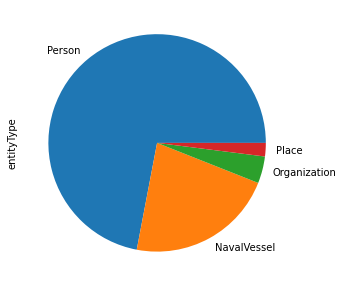

In [8]:
%matplotlib inline  
import matplotlib.pyplot as plt   
    !Q       

### Check Wikidata diff

In [9]:
import sys,json
import pandas as pd 
from datetime import datetime

now = datetime.now()
print("Last run: ", now)
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT ?item  (REPLACE(STR(?item), ".*Q", "Q") AS ?qid) ?itemLabel ?kulturnav {
  ?item wdt:P1254 ?kulturnav
  SERVICE wikibase:label { bd:serviceParam wikibase:language "sv,en". }
} order by ?itemLabel"""

def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDKulturnav = get_sparql_dataframe(endpoint_url, query)
WDKulturnav["Source"] = "Kulturnav" 

Last run:  2020-09-07 02:06:03.704647


In [10]:
WDKulturnav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7158 entries, 0 to 7157
Data columns (total 5 columns):
item         7158 non-null object
qid          7158 non-null object
itemLabel    7158 non-null object
kulturnav    7158 non-null object
Source       7158 non-null object
dtypes: object(5)
memory usage: 279.7+ KB


In [11]:
kulturnav_df

,uuid,entityType,captionsv,captionno,wdurl
0,d52e11ab-7f03-4f3e-bdc4-da24ee497c95,Person,,"Abel, Hans Holtermann (1830 - 1903)",Q20973618
1,d52e11ab-7f03-4f3e-bdc4-da24ee497c95,Person,,"Abel, Hans Holtermann (1830 - 1903)",Q20973618
2,d52e11ab-7f03-4f3e-bdc4-da24ee497c95,Person,,"Abel, Hans Holtermann (1830 - 1903)",Q20973618
3,d52e11ab-7f03-4f3e-bdc4-da24ee497c95,Person,,"Abel, Hans Holtermann (1830 - 1903)",Q20973618
4,d52e11ab-7f03-4f3e-bdc4-da24ee497c95,Person,,"Abel, Hans Holtermann (1830 - 1903)",Q20973618
...,...,...,...,...,...
995,9de040c5-c35b-406e-98dd-8280e00e6a81,Person,"Nyberg, Bernt (1927 - 1978)",,Q6019084
996,9de040c5-c35b-406e-98dd-8280e00e6a81,Person,"Nyberg, Bernt (1927 - 1978)",,Q6019084
997,9de040c5-c35b-406e-98dd-8280e00e6a81,Person,"Nyberg, Bernt (1927 - 1978)",,Q6019084
998,9de040c5-c35b-406e-98dd-8280e00e6a81,Person,"Nyberg, Bernt (1927 - 1978)",,Q6019084


In [12]:
import numpy as np
from pandas_profiling import ProfileReport

In [14]:
profile = ProfileReport(kulturnav_df, title="Pandas Profiling Report")

In [15]:
profile